In [467]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

#### Loading data

In [468]:
train_ds = tf.keras.utils.image_dataset_from_directory(directory='butterfly/train',image_size=(64, 64),batch_size=100)

Found 6499 files belonging to 75 classes.


In [469]:
train_ds = train_ds.map(lambda x,y:(x/255,y))

In [470]:
train_ds.as_numpy_iterator().next()

(array([[[[0.5764706 , 0.8303922 , 0.5294118 ],
          [0.5830882 , 0.8497549 , 0.5536765 ],
          [0.53112745, 0.8017157 , 0.54093134],
          ...,
          [0.92696077, 0.93088233, 0.9465686 ],
          [0.91568625, 0.9166667 , 0.94509804],
          [0.90857846, 0.9026961 , 0.94436276]],
 
         [[0.6       , 0.8539216 , 0.5529412 ],
          [0.5737745 , 0.84044117, 0.53995097],
          [0.51985294, 0.79044116, 0.5296569 ],
          ...,
          [0.9012255 , 0.9051471 , 0.9129902 ],
          [0.88529414, 0.8892157 , 0.9004902 ],
          [0.8637255 , 0.8617647 , 0.8843137 ]],
 
         [[0.6066176 , 0.8605392 , 0.5534314 ],
          [0.5752451 , 0.84362745, 0.5365196 ],
          [0.5328431 , 0.80735296, 0.53137255],
          ...,
          [0.8568627 , 0.86470586, 0.84656864],
          [0.8382353 , 0.8382353 , 0.8303922 ],
          [0.8401961 , 0.83431375, 0.84313726]],
 
         ...,
 
         [[0.7360294 , 0.9193627 , 0.5357843 ],
          [0.63897

In [471]:
len(train_ds)

65

#### Data Augmentation

In [472]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.3),
    tf.keras.layers.experimental.preprocessing.RandomZoom(.3)
])

In [473]:
train = train.map(lambda x, y: (data_augmentation(x, training=True), y))

#### Spliting data

In [474]:
train_size = int(len(train_ds)*.7)+1
print(train_size)
val_size = int(len(train_ds)*.3)
print(val_size)

46
19


In [475]:
train = train_ds.take(train_size)
val = train_ds.skip(train_size).take(val_size)

In [476]:
len(train)

46

In [477]:
len(val)

19

### Building CNN

In [478]:
cnn = tf.keras.models.Sequential()

In [479]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
cnn.add(tf.keras.layers.Dropout(0.2))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
cnn.add(tf.keras.layers.Dropout(0.3))   
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
cnn.add(tf.keras.layers.Dropout(0.4))   
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dropout(0.5))   
# cnn.add(tf.keras.layers.Dense(units=200,activation='relu'))
cnn.add(tf.keras.layers.Dense(units=150,activation='relu'))
cnn.add(tf.keras.layers.Dense(units=100,activation='relu'))
# cnn.add(tf.keras.layers.Dropout(0.5))
cnn.add(tf.keras.layers.Dense(units=75,activation='softmax'))


In [480]:
cnn.compile(optimizer='adam',loss="sparse_categorical_crossentropy",metrics=['accuracy'])    

#### Early Stopping

In [481]:
# Early Stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [482]:
hist = cnn.fit(x=train,validation_data=val,epochs=35,callbacks=[early_stopping])

Epoch 1/35


46/46 [==============================] - 5s 77ms/step - loss: 4.3098 - accuracy: 0.0196 - val_loss: 4.2586 - val_accuracy: 0.0263
Epoch 2/35
46/46 [==============================] - 4s 77ms/step - loss: 4.0121 - accuracy: 0.0528 - val_loss: 3.7488 - val_accuracy: 0.0843
Epoch 3/35
46/46 [==============================] - 4s 78ms/step - loss: 3.4108 - accuracy: 0.1402 - val_loss: 3.0767 - val_accuracy: 0.2159
Epoch 4/35
46/46 [==============================] - 4s 79ms/step - loss: 2.9136 - accuracy: 0.2304 - val_loss: 2.7499 - val_accuracy: 0.2833
Epoch 5/35
46/46 [==============================] - 4s 80ms/step - loss: 2.5904 - accuracy: 0.3020 - val_loss: 2.5082 - val_accuracy: 0.3386
Epoch 6/35
46/46 [==============================] - 4s 77ms/step - loss: 2.3203 - accuracy: 0.3630 - val_loss: 2.2382 - val_accuracy: 0.4002
Epoch 7/35
46/46 [==============================] - 4s 78ms/step - loss: 2.1227 - accuracy: 0.4089 - val_loss: 2.1061 - val_accuracy: 0.4381
Epoch 8/35
46/46 [======

In [483]:
cnn.summary()

Model: "sequential_46"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_74 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_74 (MaxPoolin  (None, 31, 31, 32)       0         
 g2D)                                                            
                                                                 
 dropout_70 (Dropout)        (None, 31, 31, 32)        0         
                                                                 
 conv2d_75 (Conv2D)          (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_75 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 dropout_71 (Dropout)        (None, 14, 14, 64)      

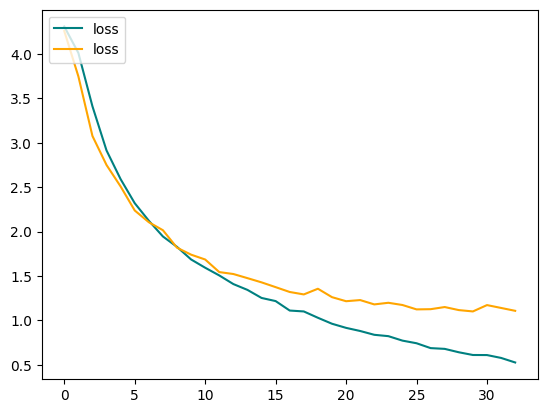

In [484]:

plt.plot(hist.history['loss'],color='teal',label='loss')
plt.plot(hist.history['val_loss'],color='orange',label='loss')
plt.legend(loc='upper left')
plt.show()


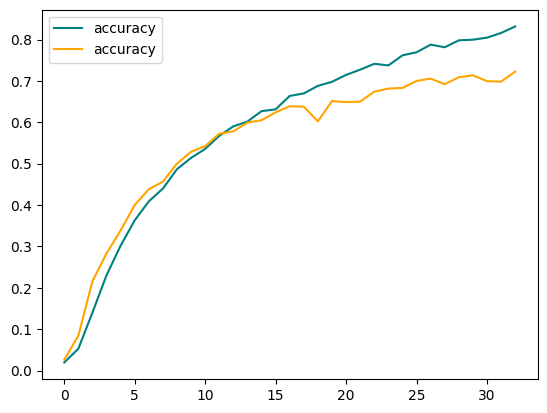

In [485]:
plt.plot(hist.history['accuracy'],color='teal',label='accuracy')
plt.plot(hist.history['val_accuracy'],color='orange',label='accuracy')
plt.legend(loc='upper left')
plt.show()
